In [15]:
from __future__ import absolute_import, division, print_function

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)



1.13.1


In [49]:
data = pd.read_csv("C:/Users/kpleu/Desktop/Git/Kaggle_Digit_Recognizer/Data/train.csv")
#submision = pd.read_csv("C:/Users/kpleu/Desktop/Git/Kaggle_Digit_Recognizer/Data/test.csv")

In [51]:
#Lables and Images for the training set
data_labels = data["label"]
data_images = data.drop(labels = ["label"],axis = 1) 
#Reshape images to 28*28
data_images = data_images.values.reshape(-1,28,28)

# Set the random seed
random_seed = 2

# Split the train and the validation set for the fitting
train_images, test_images, train_labels,  test_labels = train_test_split(data_images, data_labels, test_size = 0.15, random_state=random_seed)

In [82]:
#use .iloc to avoid error
train_labels.iloc[0]


6

In [84]:
print(len(data_labels))
print(len(train_labels))
print(len(test_labels))

42000
35700
6300


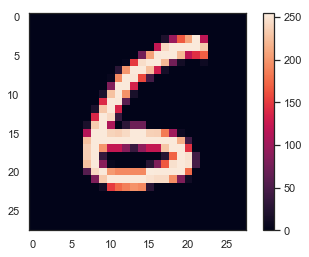

In [58]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [85]:
train_images = train_images / 255.0

test_images = test_images / 255.0

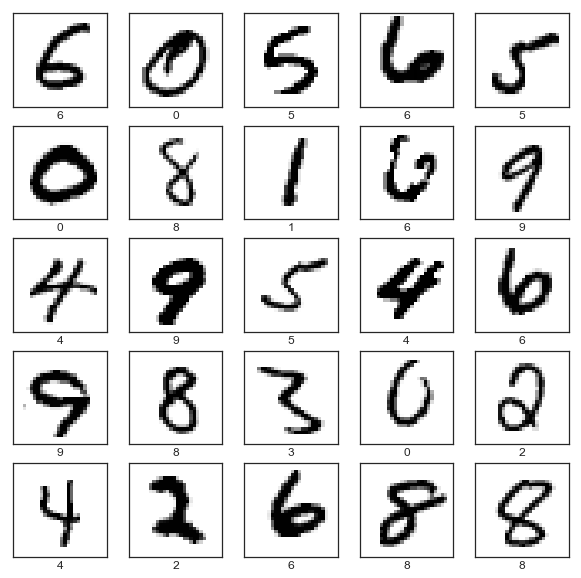

In [90]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels.iloc[i])
plt.show()

In [91]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [92]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [98]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
35700/35700 [==============================] - 3s 81us/sample - loss: 0.0113 - acc: 0.9971
Epoch 2/5
35700/35700 [==============================] - 3s 80us/sample - loss: 9.4549e-04 - acc: 0.9997
Epoch 3/5
35700/35700 [==============================] - 3s 80us/sample - loss: 2.0264e-04 - acc: 1.0000
Epoch 4/5
35700/35700 [==============================] - 3s 81us/sample - loss: 3.7427e-05 - acc: 1.0000
Epoch 5/5
35700/35700 [==============================] - 3s 78us/sample - loss: 2.2559e-05 - acc: 1.0000


In [97]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

6300/6300 [==============================] - 0s 46us/sample - loss: 0.1604 - acc: 0.9737
Test accuracy: 0.9736508


In [95]:
predictions = model.predict(test_images)

In [99]:
predictions[0]

array([1.8395170e-08, 2.1734390e-11, 2.6360574e-08, 6.6285608e-09,
       1.3077662e-08, 1.1528488e-06, 9.9999869e-01, 1.8973402e-13,
       8.6174715e-08, 4.3564272e-10], dtype=float32)

In [100]:
np.argmax(predictions[0])

6

In [112]:
test_labels.iloc[0]

6

In [117]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

KeyError: 10

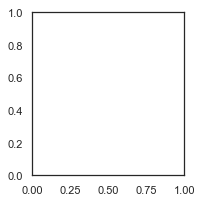

In [119]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

KeyError: 12

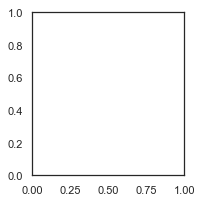

In [111]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()